In [3]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# load dataset
df=pd.read_excel('PV_NOISY.xlsx')
df.head()

,r_new,cluster
0,0.454303,10
1,0.454303,10
2,0.454313,10
3,0.454323,10
4,0.454334,10


In [4]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3'],axis=0, inplace=True)
array = df.values
irr=df['r_new']
tar=df['cluster']
x=array[:,0:]
y=array[:,1]

# RF

In [5]:
rf=RandomForestClassifier()
rf.fit(x,y)
rf_score=cross_val_score(rf,x,y,cv=5,scoring='accuracy',)
rf_score.mean()

0.994

In [6]:
rf_ypred=cross_val_predict(rf,x,y,cv=5)

In [60]:
confusion_matrix(y,rf_ypred,)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,   0,   3,   3,   0,  94,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=int64)

In [11]:
precision_score(y,rf_ypred,average='weighted')

0.9941747572815534

In [12]:
recall_score(y,rf_ypred,average='weighted')

0.994

In [13]:
f1_score(y,rf_ypred,average='weighted')

0.9939515514702147

# CART

In [29]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
dt_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
dt_score.mean()

0.986

In [30]:
dt_ypred=cross_val_predict(dt,x,y,cv=5)

In [31]:
confusion_matrix(y,dt_ypred)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  91,   0,   9],
       [  0,   0,   0,   7,   3,   3,   3,   0,  84,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=int64)

In [18]:
precision_score(y,dt_ypred,average='weighted')

0.9961538461538462

In [19]:
recall_score(y,dt_ypred,average='weighted')

0.996

In [20]:
f1_score(y,dt_ypred,average='weighted')

0.9959983993597439

# Naive Bayes

In [39]:
nb=GaussianNB()
nb.fit(x,y)
nb_score=cross_val_score(nb,x,y,cv=5,scoring='accuracy')
nb_score.mean()

1.0

In [40]:
nb_ypred=cross_val_predict(nb,x,y,cv=5)

In [41]:
confusion_matrix(y,nb_ypred)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=int64)

In [42]:
precision_score(y,nb_ypred,average='weighted')

1.0

In [43]:
recall_score(y,nb_ypred,average='weighted')

1.0

In [44]:
f1_score(y,nb_ypred,average='weighted')

1.0

In [45]:
df['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      10
1      10
2      10
3      10
4      10
       ..
995     1
996     1
997     1
998     1
999     1
Name: cluster, Length: 1000, dtype: int64>

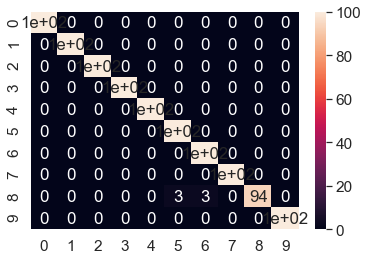

In [47]:
import seaborn as sns
sns.heatmap(rf_cm, annot=True)

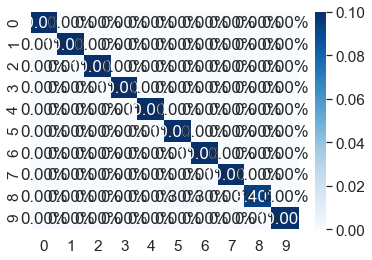

In [48]:
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [59]:
#labels = [0,1,2,3,4,5,6,7,8,9]
#labels = np.asarray(labels).reshape(10,9)
#sns.heatmap(rf_cm, annot=labels, cmap='Blues')
sns.heatmap(rf_cm_3x3, figsize=(8,6), cbar=False)

NameError: name 'rf_cm_3x3' is not defined